<a href="https://colab.research.google.com/github/Arthurcool/mlcourse.ai/blob/main/netflix_analasys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import glob
from google.colab import drive

In [ ]:
credits = pd.read_csv("/gdrive/My Drive/Colab/credits.csv")
titles = pd.read_csv("/gdrive/My Drive/data/titles.csv")

Посмотрим из чего состоят наши таблицы

In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [ ]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

Выполним разделение по странам и жанрам для корректного анализа в дальнейшем

In [ ]:
import ast
import random

In [ ]:
def repair_array_bound_categories(arr):
    arr = ast.literal_eval(arr)
    
    if len(arr) == 0:
        return np.nan
    
    elif len(arr) == 1:
        return arr[0]
    
    else:
        return random.choice(arr)

In [ ]:
titles["production_countries"] = titles["production_countries"].apply(repair_array_bound_categories)
titles["genres"] = titles["genres"].apply(repair_array_bound_categories)

Посмотрим на первые пять строков таблицы, для понимания с чем имеем дело и что можно проанализировать

In [ ]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,crime,US,NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,drama,US,NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,fantasy,GB,NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,action,GB,NaN,tt0061578,7.7,72662.0,20.398,7.600


1. Посмотрим кол-во фильмов и сериалов

In [ ]:
titles.groupby('type').size().reset_index().rename(columns={0: 'count'})

,type,count
0,MOVIE,3744
1,SHOW,2106


1.1 Кол-во фильмов и сериалов в Британии для примера

In [ ]:
data_en = titles[titles['production_countries']=='GB']

In [ ]:
data_en.groupby('type').size().reset_index().rename(columns={0: 'count'})

,type,count
0,MOVIE,170
1,SHOW,139


2. Посмотрим кол-во фильмов и сериалов за разные года

In [ ]:
data_movie = titles[titles['type']=='MOVIE']
data_show = titles[titles['type']=='SHOW']

Далее анализ произведен и с помощью группировки таблиц, и визуально с помощью библиотеки Plotly

In [ ]:
data_movie.groupby('release_year').size()

release_year
1954      2
1956      1
1958      1
1959      1
1960      1
       ... 
2018    473
2019    525
2020    500
2021    473
2022    200
Length: 62, dtype: int64

In [ ]:
k = titles.groupby(['release_year','type']).size().reset_index().rename(columns={0:'countd'})

k

,release_year,type,countd
0,1945,SHOW,1
1,1954,MOVIE,2
2,1956,MOVIE,1
3,1958,MOVIE,1
4,1959,MOVIE,1
...,...,...,...
99,2020,SHOW,314
100,2021,MOVIE,473
101,2021,SHOW,314
102,2022,MOVIE,200


тоже самое в графике

In [ ]:
fig = px.line(k, x='release_year', y='countd', color='type')

fig.show()

Тот же график только в Seaborn

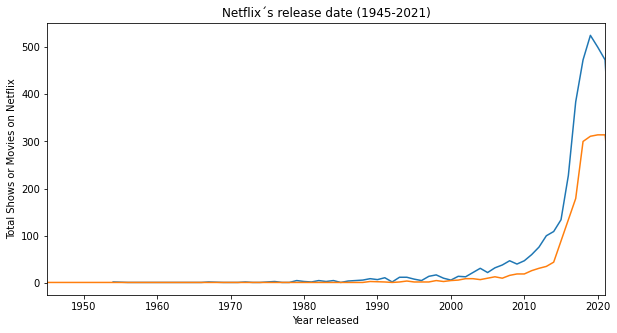

In [ ]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=data_movie.groupby('release_year').size())

sns.lineplot(data=data_show.groupby('release_year').size())

sns.set_style('dark')

plt.title('Netflix´s release date (1945-2021)')
plt.xlim(1945, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows or Movies on Netflix')
plt.show()

2. Оценим изменчивость суммарных оценок на IMDb от года

In [ ]:
t_sum = titles.groupby(['release_year', 'type'])['imdb_score'].sum().reset_index()
t_sum


,release_year,type,imdb_score
0,1945,SHOW,0.0
1,1954,MOVIE,14.9
2,1956,MOVIE,6.7
3,1958,MOVIE,7.5
4,1959,MOVIE,6.6
...,...,...,...
99,2020,SHOW,1751.9
100,2021,MOVIE,2579.4
101,2021,SHOW,1945.5
102,2022,MOVIE,1070.2


Разделим на таблицы по признакам: Фильм, Сериал

In [ ]:
m_score = data_movie.groupby('release_year')['imdb_score'].sum().reset_index()

s_score = data_show.groupby('release_year')['imdb_score'].sum().reset_index()

In [ ]:
fig = px.bar(t_sum, y='imdb_score', x='release_year',color='type', height=400)
fig.show()

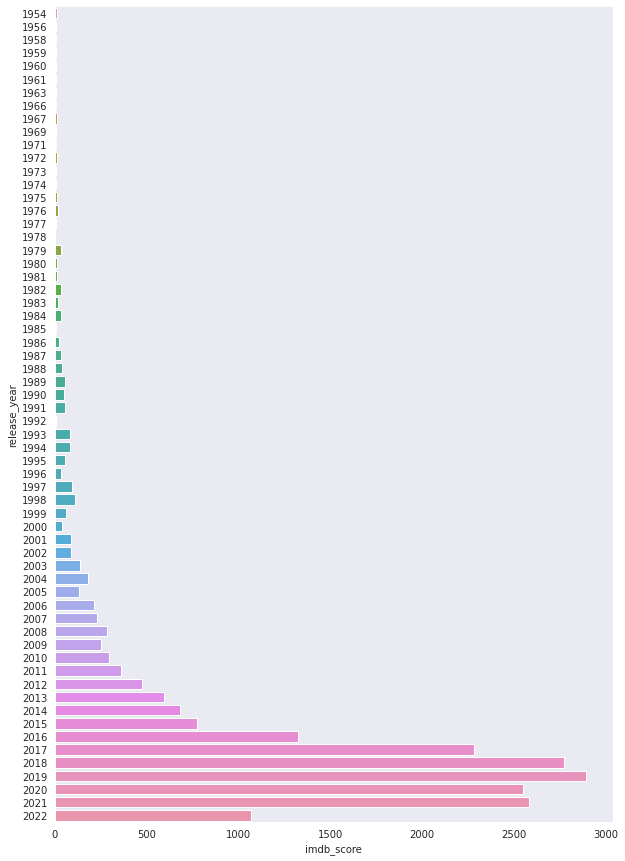

In [ ]:
plt.figure(figsize=(10, 15))

sns.barplot(y='release_year', x='imdb_score', data=m_score, orient='h')

#plt.title('Netflix´s release date (1945-2021)')
#plt.xlabel('Year released')
#plt.ylabel('Total Shows or Movies on Netflix')
plt.show()

посмотрим на рейтинги от жанра

In [ ]:
dt_score_m = data_movie.groupby('genres')['imdb_score'].sum().reset_index()
dt_score_m.sort_values('imdb_score', ascending=False, inplace=True)

dt_score_s = data_show.groupby('genres')['imdb_score'].sum().reset_index()
dt_score_s.sort_values('imdb_score', ascending=False, inplace=True)

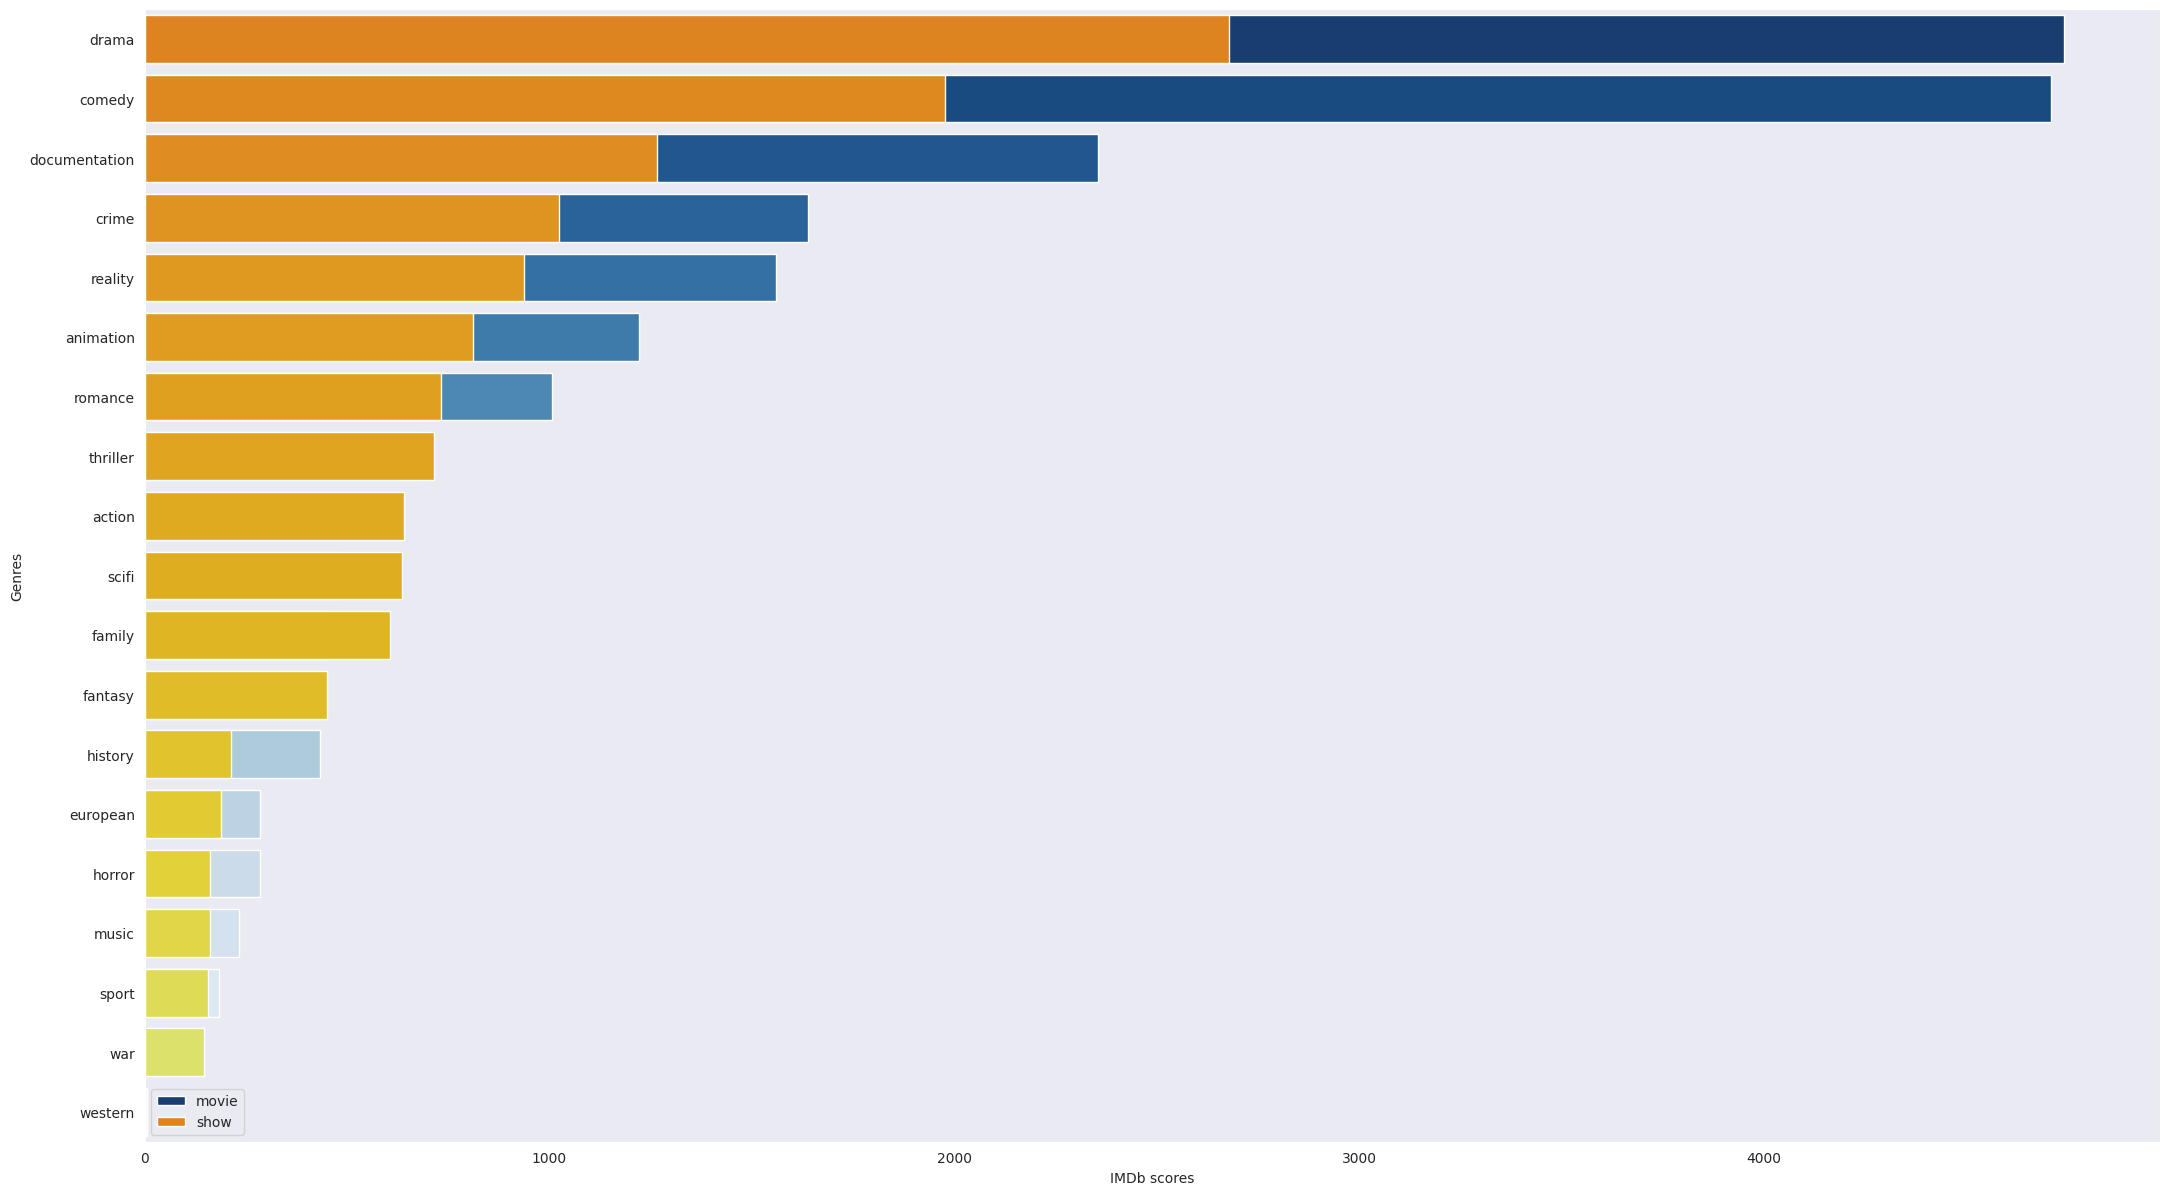

In [ ]:
plt.figure(figsize=(26, 15), dpi=100)
sns.barplot(data=dt_score_m, x='imdb_score', y='genres', palette='Blues_r', label='movie')

sns.barplot(data=dt_score_s, x='imdb_score', y='genres', palette='Wistia_r', label='show')

plt.legend()
plt.xlabel('IMDb scores')
plt.ylabel('Genres')
plt.show()



In [ ]:
import plotly.express as px
fig = px.pie(values=f.imdb_score, names=f.production_countries, hole=.7)
fig.show()


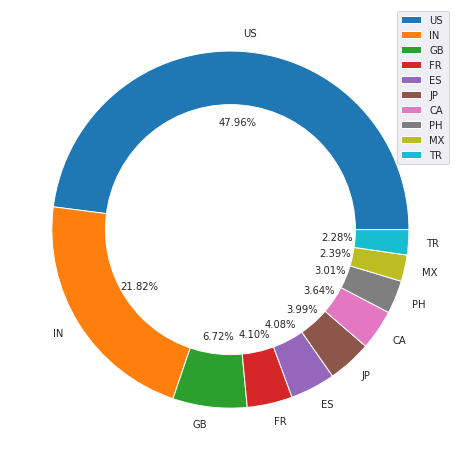

In [ ]:

plt.figure(figsize=(8,9))
plt.pie(f.imdb_score,autopct='%1.2f%%', labels = f.production_countries,labeldistance=1.1, rotatelabels=False)



my_circle=plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)



plt.legend(f.production_countries)
plt.show()


In [ ]:
import plotly.express as px
fig = px.pie(values=h.imdb_score, names=h.production_countries, hole=.7)
fig.show()


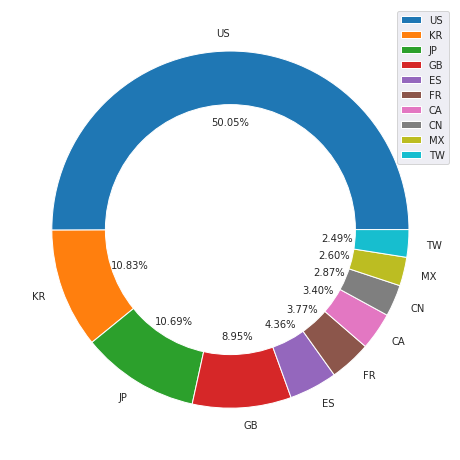

In [ ]:

plt.figure(figsize=(8,9))

plt.pie(h.imdb_score,autopct='%1.2f%%', labels = h.production_countries,labeldistance=1.1, rotatelabels=False)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)



plt.legend(h.production_countries)
plt.show()


In [ ]:
r_df = credits[credits['name']=='Robert De Niro']
r_df

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
572,3748,tm155787,Robert De Niro,James Conway,ACTOR
749,3748,tm180542,Robert De Niro,David 'Noodles' Aaronson,ACTOR
1038,3748,tm145608,Robert De Niro,Leonard Lowe,ACTOR
41169,3748,tm311902,Robert De Niro,Himself (Uncredited),ACTOR
44283,3748,tm244149,Robert De Niro,Frank Sheeran,ACTOR
57682,3748,tm844497,Robert De Niro,Self,ACTOR


In [ ]:
titles[titles['id']=='tm155787']

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
36,tm155787,GoodFellas,MOVIE,"The true story of Henry Hill, a half-Irish, ha...",1990,R,145,drama,US,NaN,tt0099685,8.7,1131681.0,50.387,8.463
